# Newton rapson method

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def equation_1(x):
    y = np.cos(x) - x**3
    return y

In [22]:
#this is an approximation
#h is a small number tending to zero
def derivative(x, h = 1e-5, equation = equation_1):
    d = (equation(x+h)-equation(x))/h
    return d

#else we can just do it by hand, uncomment the code below
#def derivative(x):
#    y = -np.sin(x) - 3*x**2
#    return y

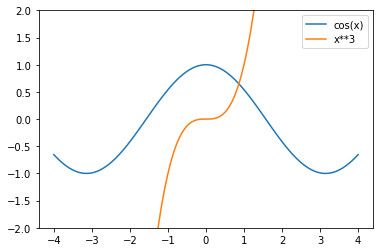

In [23]:
# visualizing the equation
x_plot = np.linspace(-4,4,100)
y_plot_1 = np.cos(x_plot)
y_plot_2 = (x_plot)**3
    
plt.plot(x_plot,y_plot_1,label = "cos(x)")
plt.plot(x_plot,y_plot_2,label = "x**3")
plt.ylim(-2, 2)
plt.legend()
plt.show()

In [29]:
def newton_raphson(x0,epsilon = 1e-6, equation = equation_1, print_ = True):
    sol = []
    prec = []
    k = 1
    x = x0 - (equation(x0)/derivative(x0))
    while np.abs(x-x0)>epsilon :
        if print_:
            print(('-> at it. %g we get the following solution: %s with derivative %s')%(k,x,derivative(x0)))

        k+=1
        precision_prev = abs(x-x0)
        #print(x0)
        x0 = x
        x = x0 - (equation(x0)/derivative(x0))
        sol.append(x)
        
        precision = abs(x-x0)
        prec.append(precision)
        
        if k >100:
            print('!! Takes too many iterations to converge')
            break

    print(' ')     
    print(('FINAL Solution: the newton-raphson took %g iterations, found the following result: %s with precision: %s') 
          %(k,x,abs(x-x0)))
    return sol, prec,k

In [30]:
sol_1, prec_1,k_1 = newton_raphson(x0 = 1)

-> at it. 1 we get the following solution: 0.8803339182633899 with derivative -3.841503686430325
-> at it. 2 we get the following solution: 0.8656843317453339 with derivative -3.095944609821099
-> at it. 3 we get the following solution: 0.8654740780623565 with derivative -3.0097962682829045
 
FINAL Solution: the newton-raphson took 4 iterations, found the following result: 0.8654740331020528 with precision: 4.4960303702268334e-08


#### approximation

In [31]:
for i in range(len(prec_1)):
    precisione = [x for x in format(prec_1[i], '.10f')]
    soluzione = [x for x in format(sol_1[i], '.10f')]
    #print(precisione)
    count = 1
    
    for j in range(len(precisione)-2):
        if precisione[j+2] == '0' :
            count += 1
            if precisione[j+2+1] == '1':
                count += 1
     #       print(precisione[j+2])
            
        #print(soluzione)
        else:
            break

    print(('iter. %g, solution: %s precision: %s')%(i+2,''.join(soluzione[:count+2]),''.join(precisione[:count+2])))
        
   # print(count)


iter. 2, solution: 0.865 precision: 0.014
iter. 3, solution: 0.8654 precision: 0.0002
iter. 4, solution: 0.86547403 precision: 0.00000004


#### let's see what happens if we start elsewhere (different x0)

In [35]:
intervalli = np.arange(-10,10,0.01)
#print(intervalli)
k_min = 100
val_iniziale = 0
for i in intervalli:
    print(' ')
    print('###############################################')
    print(' ')
    print(('---  x0: %g')%(i))
    sol, prec,k = newton_raphson(x0 = i, epsilon = 1e-7,print_=False)
    if k < k_min and i !=0:
        k_min = k
        val_iniziale = i
print("")
print(('converges faster with starting value %g, took %g iterations')%(val_iniziale,k_min))

 
###############################################
 
---  x0: -10
 
FINAL Solution: the newton-raphson took 13 iterations, found the following result: 0.8654740331016214 with precision: 7.216941488863426e-10
 
###############################################
 
---  x0: -9.99
 
FINAL Solution: the newton-raphson took 13 iterations, found the following result: 0.8654740331016183 with precision: 3.9918657268600555e-10
 
###############################################
 
---  x0: -9.98
 
FINAL Solution: the newton-raphson took 13 iterations, found the following result: 0.8654740331016166 with precision: 2.2396851040440424e-10
 
###############################################
 
---  x0: -9.97
 
FINAL Solution: the newton-raphson took 13 iterations, found the following result: 0.8654740331016156 with precision: 1.2795253745423452e-10
 
###############################################
 
---  x0: -9.96
 
FINAL Solution: the newton-raphson took 13 iterations, found the following result: 0.865474033

In [36]:
def bisezione(a,b,tol, h = 1e-5, equation = equation_1):
    k = 0
    fa = equation(a)
    while (b-a)> tol:
        k+=1
        punto_medio = (a+b)/2
        fpunto_medio = equation(punto_medio)
        if fpunto_medio*equation(a)>0:
            a = punto_medio
            fa = equation(a)
        else:
            b = punto_medio
    precision = np.float32(abs(b-a))
    print(('il metodo di bisezione ha richiesto %g iterazioni, trovando il seguente risultato: %f con precisione: %f') 
          %(k,punto_medio,precision))         

In [11]:
bisezione(3,9, tol = 0.001)

il metodo di bisezione ha richiesto 13 iterazioni, trovando il seguente risultato: 8.999268 con precisione: 0.000732
